In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import requests
from io import StringIO
from functions import splitColumnsDF
from functions import readWholeDataset

Loading function...


In [2]:
# ================ Import Data gun file  ========================
urlGunViolence = "../gun-violence-data_01-2013_03-2018.csv"
# Read whole dataset
readWholeDataset(urlGunViolence)


Gun Stolen First iteration - 34239 rows
Starting analysis for gun_stolen...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for gun_type...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_age...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_age_group...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_gender...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_relationship...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_status...
Removing empty values...
Splitting dataframe...
Grouping v

Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_age...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_age_group...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_gender...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_relationship...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_status...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
Starting analysis for participant_type...
Removing empty values...
Splitting dataframe...
Grouping values...
Merging incident_id...
Completed!
******************************* 7 iteration - Rows: 205434 | RowsSize: 34

In [3]:
# ================= Loading cleaned data  ===================== 
try:
    print("Loading files")
    gunViolenceDf = pd.read_pickle("Resources/gunViolence.pkl")
    print("Loading gunViolenceDf")
    gunStolenDF = pd.read_pickle("Resources/gunStolen.pkl")
    print("Loading gunStolenDF")
    gunTypeDF = pd.read_pickle("Resources/gunType.pkl")
    print("Loading gunTypeDF")
    ageDF = pd.read_pickle("Resources/age.pkl")
    print("Loading ageDF")
    ageGroupDF = pd.read_pickle("Resources/ageGroup.pkl")
    print("Loading ageGroupDF")a
    genderDF = pd.read_pickle("Resources/gender.pkl")
    print("Loading genderDF")
    relationshipDF = pd.read_pickle("Resources/relationship.pkl")
    print("Loading relationshipDF")
    statusDF = pd.read_pickle("Resources/status.pkl")
    print("Loading statusDF")
    typeDF = pd.read_pickle("Resources/type.pkl")
    print("Loading typeDF")
except Exception:
    print("No pickle files found")

Loading files
Loading gunViolenceDf
Loading gunStolenDF
Loading gunTypeDF
Loading ageDF
Loading ageGroupDF
Loading genderDF
Loading relationshipDF
Loading statusDF
Loading typeDF


In [4]:
# This is an interesting finding
display(gunStolenDF["Value"].value_counts(normalize=True))
display(gunTypeDF["Value"].value_counts(normalize=True))
display(ageDF["Value"].value_counts(normalize=True))
display(ageGroupDF["Value"].value_counts(normalize=True))
display(genderDF["Value"].value_counts(normalize=True))
display(relationshipDF["Value"].value_counts(normalize=True))
display(statusDF["Value"].value_counts(normalize=True))
display(typeDF["Value"].value_counts(normalize=True))

Stolen        0.824868
Not-stolen    0.175132
Name: Value, dtype: float64

Unknown       0.667778
Handgun       0.121645
mm            0.042084
 Auto         0.038058
Shotgun       0.024629
Rifle         0.022081
 LR           0.021432
 SW           0.018145
 Spl          0.012152
 Rem [AR-]    0.008617
 gauge        0.008569
 Mag          0.006794
. [AK-]       0.005903
 Win          0.000746
- Win         0.000725
- Spr         0.000490
Other         0.000152
Name: Value, dtype: float64

19     0.050547
20     0.047642
18     0.047142
21     0.047009
22     0.046250
         ...   
101    0.000009
311    0.000005
98     0.000005
209    0.000005
100    0.000005
Name: Value, Length: 104, dtype: float64

Adult +    0.889783
Teen -     0.092489
Child -    0.017728
Name: Value, dtype: float64

Male      0.837415
Female    0.162585
Name: Value, dtype: float64

Armed Robbery                                0.297794
Family                                       0.220186
Significant others - current or former       0.218985
Friends                                      0.066359
Aquaintance                                  0.059913
Neighbor                                     0.044366
Home Invasion - Perp Does Not Know Victim    0.043355
Home Invasion - Perp Knows Victim            0.018833
Gang vs Gang                                 0.018201
Co-worker                                    0.008658
Drive by - Random victims                    0.001959
Mass shooting - Random victims               0.000758
Mass shooting - Perp Knows Victims           0.000632
Name: Value, dtype: float64

Injured                        0.327623
Unharmed                       0.227475
Unharmed, Arrested             0.220021
Killed                         0.186454
Arrested                       0.026493
Injured, Arrested              0.011421
Killed, Arrested               0.000180
Injured, Unharmed              0.000101
Injured, Unharmed, Arrested    0.000076
Killed, Unharmed               0.000073
Killed, Unharmed, Arrested     0.000049
Killed, Injured                0.000035
Name: Value, dtype: float64

Victim             0.520258
Subject-Suspect    0.479742
Name: Value, dtype: float64

In [5]:
display(gunStolenDF["year"].value_counts())
display(gunTypeDF["year"].value_counts())
display(ageDF["year"].value_counts())
display(ageGroupDF["year"].value_counts())
display(genderDF["year"].value_counts())
display(relationshipDF["year"].value_counts())
display(statusDF["year"].value_counts())
display(typeDF["year"].value_counts())

2017    2740
2016    2539
2015    2533
2018     626
2014     478
2013       3
Name: year, dtype: int64

2017    63708
2016    40690
2015    22329
2018    14413
2014     3625
2013       66
Name: year, dtype: int64

2017    54676
2016    53987
2015    47996
2014    42599
2018    11974
2013      789
Name: year, dtype: int64

2017    52720
2016    51492
2014    46943
2015    46028
2018    11517
2013      352
Name: year, dtype: int64

2017    57721
2016    57224
2014    51995
2015    51659
2018    12825
2013      400
Name: year, dtype: int64

2016    5380
2017    4504
2015    4271
2018     869
2014     766
2013      33
Name: year, dtype: int64

2017    73596
2016    73051
2015    65275
2014    59728
2018    16197
2013      567
Name: year, dtype: int64

2017    72853
2016    72837
2014    70832
2015    65365
2018    16080
2013      462
Name: year, dtype: int64

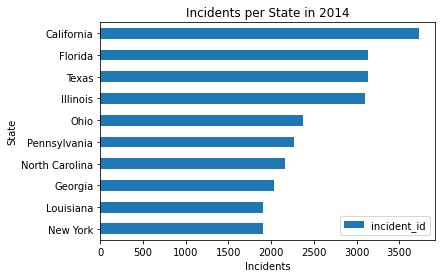

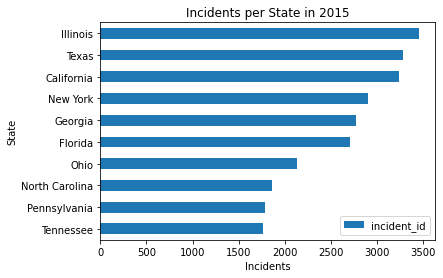

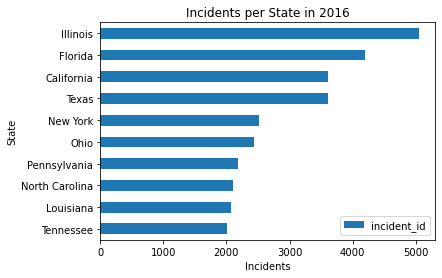

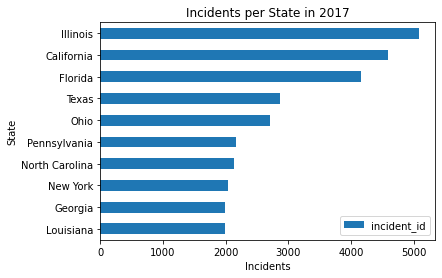

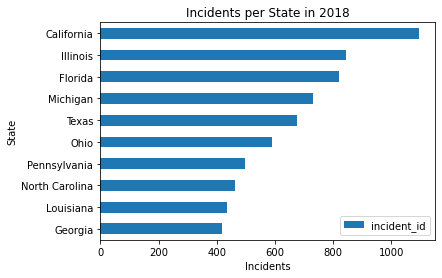

In [6]:
# Incidents per year
year = 2013
for i in range(0, 5):
    year += 1
    statesPerYear = gunViolenceDf.loc[gunViolenceDf["year"] == year].groupby(by=["state"], as_index=False).count()
    statesPerYear = statesPerYear[["state","incident_id"]]
    statesPerYear.sort_values(by=["incident_id"], ascending=False, inplace=True)
    statesPerYear = statesPerYear[0:10]
    statesPerYear.set_index("state", inplace=True)
    # Plot
    statesPerYear = statesPerYear.sort_values(by="incident_id",ascending=True)
    statesPerYear.plot(kind="barh", title=f"Incidents per State in {year}")
    plt.xlabel("Incidents")
    plt.ylabel("State")
    plt.show()

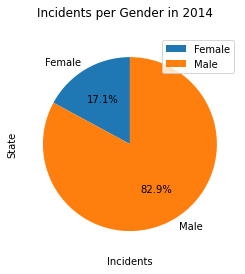

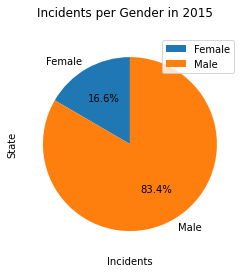

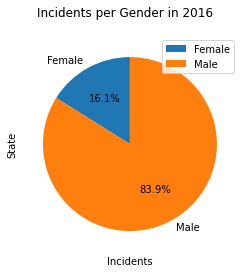

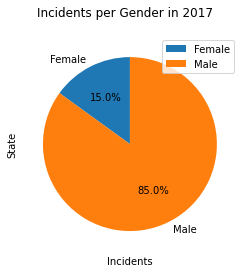

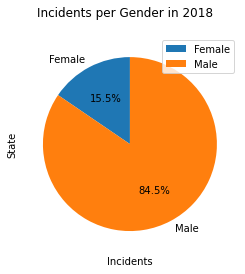

In [9]:
# There are 17 with no gender
#genderDF = splitColumnsDF(gunViolenceDf,"incident_id","participant_gender", "Unknown", True)

year = 2013
for i in range(0, 5):
    year += 1
    statesPerYear = genderDF.loc[genderDF["year"] == year].groupby(by=["Value"], as_index=False).sum()
    statesPerYear = statesPerYear[["Value","incident_id"]]
    statesPerYear.set_index("Value",inplace=True)
    #display(statesPerYear.head())

    # Plot
    #statesPerYear = statesPerYear.sort_values(by="incident_id",ascending=True)
    statesPerYear.plot(kind="pie", title=f"Incidents per Gender in {year}", subplots=True, autopct='%1.1f%%',startangle=90, )
    plt.xlabel("Incidents")
    plt.ylabel("State")
    plt.show()


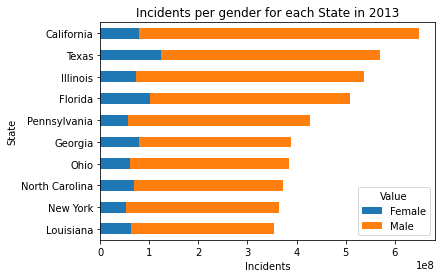

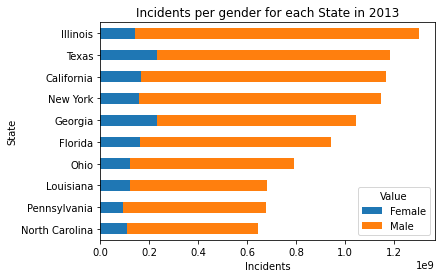

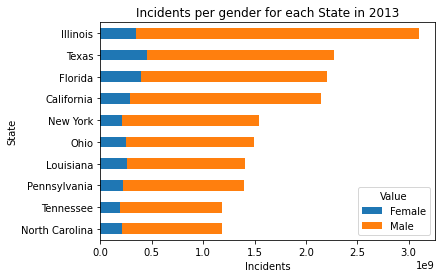

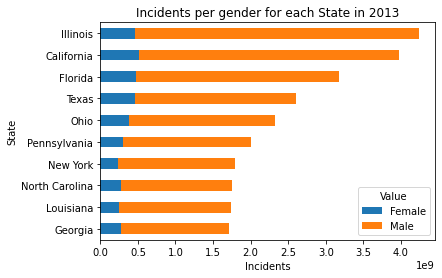

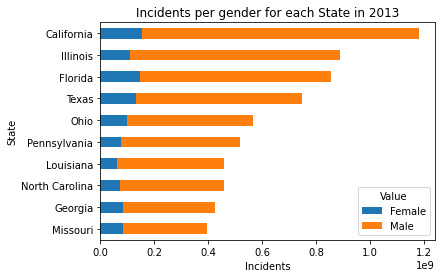

In [10]:
# There are 17 with no gender
#genderDF = splitColumnsDF(gunViolenceDf,"incident_id","participant_gender", "Unknown", True)
year = 2013
for i in range(0, 5):
    year += 1
    statesPerYear = genderDF.loc[genderDF["year"] == year].groupby(by=["state","Value"], as_index=False).sum()
    statesPerYear = statesPerYear[["state","Value","incident_id"]]
    statesPerYear = statesPerYear.pivot(index="state", columns="Value",values="incident_id")
    statesPerYear.reset_index(inplace=True)
    statesPerYear.set_index("state", inplace=True)

    statesPerYear["Total"] = statesPerYear["Male"].add(statesPerYear["Female"])
    statesPerYear = statesPerYear.sort_values(by="Total", ascending=False)
    statesPerYear = statesPerYear[0:10]

    # Plot
    statesPerYear = statesPerYear.sort_values(by="Total",ascending=True)
    statesPerYear[["Female","Male"]].plot(kind="barh", stacked=True, title="Incidents per gender for each State in 2013")
    plt.xlabel("Incidents")
    plt.ylabel("State")
    plt.show()


<Figure size 7200x7200 with 0 Axes>

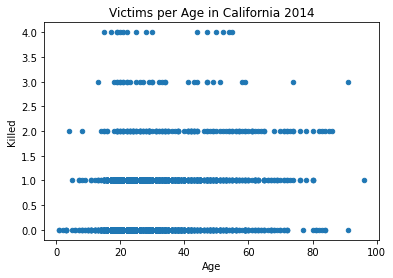

<Figure size 7200x7200 with 0 Axes>

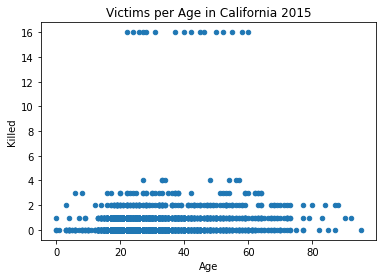

<Figure size 7200x7200 with 0 Axes>

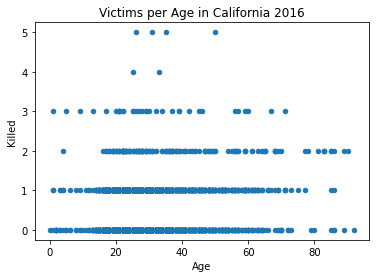

<Figure size 7200x7200 with 0 Axes>

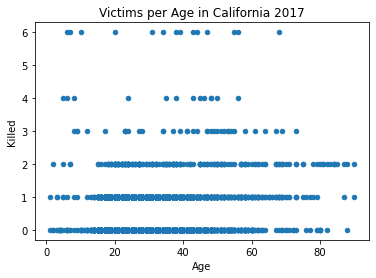

<Figure size 7200x7200 with 0 Axes>

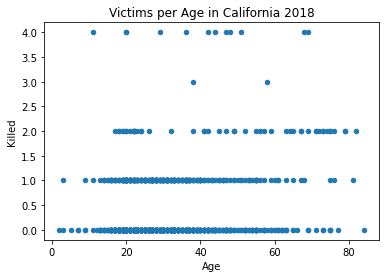

In [15]:
#ageDF = splitColumnsDF(gunViolenceDf,"incident_id","participant_age", "Unknown", False)

# There are rows with age = 0 and age > 100
#display(ageDF["Value"].unique())
year = 2013
for i in range(0, 5):
    year += 1
    statesPerYear = ageDF.loc[(ageDF["year"] == year)
                              & (ageDF["state"] == "California")
                              #& (ageDF["Value"] > 0)
                              #& (ageDF["year"] < 100)
                             ]
    

    # Plot
    statesPerYear = statesPerYear[["Value","n_killed","n_injured"]]
    
    plt.figure(figsize=(100,100))
    statesPerYear.plot(x = "Value", y = "n_killed", kind="scatter",
                       title=f"Victims per Age in California {year}")
    plt.xlabel("Age")
    plt.ylabel("Killed")
    plt.show()


In [ ]:
#ageDF = splitColumnsDF(gunViolenceDf,"incident_id","participant_age", "Unknown", False)

# There are rows with age = 0 and age > 100
#display(ageDF["Value"].unique())
plt.figure(figsize=(10,10))
#Top 10 of incidents per State in 2013
statesPerYear = ageDF.loc[(ageDF["year"] == 2014)
                          & (ageDF["state"] == "California")
                          #& (ageDF["Value"] > 0)
                          #& (ageDF["year"] < 100)
                         ]
#display(statesPerYear.head())

# Plot
statesPerYear = statesPerYear[["Value","n_killed","n_injured"]]
#display(statesPerYear)
#plt.plot(statesPerYear["Value"],statesPerYear["n_killed"])
statesPerYear.plot(x = "Value", y = "n_killed", kind="scatter",
                   title="Victims per Age in California 2014")
plt.xlabel("Age")
plt.ylabel("Killed")
plt.show()


In [ ]:
#ageDF = splitColumnsDF(gunViolenceDf,"incident_id","participant_age", "Unknown", False)

# There are rows with age = 0 and age > 100
#display(ageDF["Value"].unique())

#Top 10 of incidents per State in 2013
statesPerYear = ageDF.loc[(ageDF["year"] == 2013)
                          & (ageDF["state"] == "California")
                          #& (ageDF["Value"] > 0)
                          #& (ageDF["year"] < 100)
                         ]
#display(statesPerYear.head())

# Plot
statesPerYear = statesPerYear[["Value","n_killed","n_injured"]]
#display(statesPerYear)
#plt.plot(statesPerYear["Value"],statesPerYear["n_killed"])
statesPerYear.plot(x = "Value", y = "n_injured", kind="scatter",
                   title="Injured per Age in California 2013")
plt.xlabel("Age")
plt.ylabel("Injured")
plt.show()


In [ ]:
#ageDF = splitColumnsDF(gunViolenceDf,"incident_id","participant_age", "Unknown", False)

# There are rows with age = 0 and age > 100
#display(ageDF["Value"].unique())

#Top 10 of incidents per State in 2013
statesPerYear = ageDF.loc[(ageDF["year"] == 2014)
                          & (ageDF["state"] == "California")
                          #& (ageDF["Value"] > 0)
                          #& (ageDF["year"] < 100)
                         ]
#display(statesPerYear.head())

# Plot
statesPerYear = statesPerYear[["Value","n_killed","n_injured"]]
#display(statesPerYear)
#plt.plot(statesPerYear["Value"],statesPerYear["n_killed"])
statesPerYear.plot(x = "Value", y = "n_injured", kind="scatter",
                   title="Injured per Age in California 2014")
plt.xlabel("Age")
plt.ylabel("Injured")
plt.show()
